# Single Layer of Neural Network

In [4]:
# Settings
num_units = 5

## Basic Layout
![Single Layer NN](http://cs231n.github.io/assets/nn1/neural_net.jpeg)
- This neural network is constructed with input layer, hidden layer, and output layer.
- For our example, each node represent the 1-degree linear function, and the function is normalized with activation function.
    - Activation functions are described in previous chapter
- Lets assume we have 2 inputs, and M hidden nodes. (h and g represent the activation function)
    - Hidden Layer:
$$
\textbf{Z}
\begin{cases}
z_1 = h(w_{11}x_1 + w_{21}x_2 + b_1)\\
z_2 = h(w_{12}x_1 + w_{22}x_2 + b_2)\\
\vdots\\
z_M = h(w_{1M}x_1 + w_{2M}x_2 + b_M)
\end{cases}
$$
    - Output Layer:
$$ z = \sigma ( w_1z_1 + w_2z_2 + \dots + w_Mz_m + b) $$

## In depth about the hidden layer
- Essentially, each node in the hidden layer represent a line (linear function) that split the $\mathbb{R}^{N_{input}}$ into two different region.
- Manny hidden layer divide the $\mathbb{R}^{N_{input}}$ into multiple sections, and this process allow the output layer to individually examine the properties of each sections.
- This is useful if the output data is scattered in non-linear passion.

## Model (2 inputs, 2 hidden layer)
- Data can be represented by following:
$$
\textbf{X} = 
\begin{pmatrix}
x_{11} & x_{21} \\
x_{12} & x_{22} \\
x_{13} & x_{23} \\
\vdots & \vdots
\end{pmatrix}, \quad
t = 
\begin{pmatrix}
t_1 \\ t_2 \\ t_3 \\ \vdots
\end{pmatrix}\\
$$
- Hidden layer:
$$
\textbf{Z} = \tanh(\textbf{XW}_1 \oplus \textbf{b}_1) \\
\textbf{W}_{1} = 
\begin{pmatrix}
w_{11} & w_{12} \\
w_{21} & w_{22}
\end{pmatrix},\quad
\textbf{b}_1 = (b_1,b_2)
$$
    - Note, number of row of $\textbf{Z}$ is the number of data (row of $\textbf{X}$).
- Output layer:
$$
\textbf{P} = \sigma(\textbf{ZW}_0 \oplus b_0) \\
\textbf{W}_{0} = 
\begin{pmatrix}
w_{10}\\
w_{20}
\end{pmatrix},\quad
$$

In [1]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import plot_model

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [22]:
# Build Layers
model = Sequential()
model.add(Dense(num_units, input_dim = 2,
               activation = 'relu',
               kernel_initializer='truncated_normal',
               bias_initializer='zeros'))
model.add(Dense(1,
                activation = 'sigmoid',
                kernel_initializer = 'zeros',
                bias_initializer = 'zeros'))

In [23]:
# Build Compiler
model.compile(optimizer = 'Adam',
              loss = 'binary_crossentropy',
              metrics=['accuracy'])

In [24]:
model.get_config()

[{'class_name': 'Dense',
  'config': {'activation': 'relu',
   'activity_regularizer': None,
   'batch_input_shape': (None, 2),
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'dtype': 'float32',
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'TruncatedNormal',
    'config': {'mean': 0.0, 'seed': None, 'stddev': 0.05}},
   'kernel_regularizer': None,
   'name': 'dense_4',
   'trainable': True,
   'units': 5,
   'use_bias': True}},
 {'class_name': 'Dense',
  'config': {'activation': 'sigmoid',
   'activity_regularizer': None,
   'bias_constraint': None,
   'bias_initializer': {'class_name': 'Zeros', 'config': {}},
   'bias_regularizer': None,
   'kernel_constraint': None,
   'kernel_initializer': {'class_name': 'Zeros', 'config': {}},
   'kernel_regularizer': None,
   'name': 'dense_5',
   'trainable': True,
   'units': 1,
   'use_bias': True}}]

## Prepare Data

In [25]:
import numpy as np
import math

from numpy.random import multivariate_normal, permutation
import pandas as pd
from pandas import DataFrame, Series

np.random.seed(20180114)

In [26]:
def generate_datablock(n, mu, var, t):
    data = multivariate_normal(mu, np.eye(2)*var, n)
    df = DataFrame(data, columns=['x1','x2'])
    df['t'] = t
    return df

df0 = generate_datablock(15, [7,7], 22, 0)
df1 = generate_datablock(15, [22,7], 22, 0)
df2 = generate_datablock(10, [7,22], 22, 0)
df3 = generate_datablock(25, [20,20], 22, 1) # This dataset is different (distinguish)

df = pd.concat([df0, df1, df2, df3], ignore_index=True)
train_set = df.reindex(permutation(df.index)).reset_index(drop=True)

train_x = train_set[['x1','x2']].as_matrix()
train_t = train_set['t'].as_matrix().reshape([len(train_set), 1])

train_set1 = train_set[train_set['t']==1]
train_set2 = train_set[train_set['t']==0]

### Visualize Data

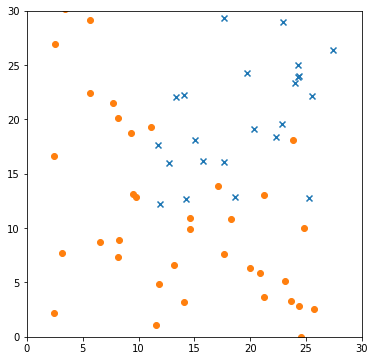

In [27]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

## Training

In [28]:
model.fit(train_x, train_t, epochs=4000, verbose=0)

## Result

In [37]:
model.get_weights()

[array([[ 0.17554052, -0.0211264 , -0.22472161, -0.01135319, -0.21651313],
        [-0.31843072, -0.01738541,  0.051452  , -0.00633617,  0.04238552]],
       dtype=float32),
 array([2.227543 , 0.       , 2.0621786, 0.       , 2.133677 ],
       dtype=float32),
 array([[-1.5170181],
        [ 0.       ],
        [-3.039786 ],
        [ 0.       ],
        [-3.265666 ]], dtype=float32),
 array([1.9284889], dtype=float32)]

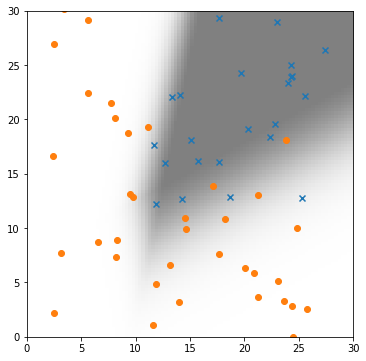

In [38]:
fig = plt.figure(figsize=(6,6))
subplot = fig.add_subplot(1,1,1)
subplot.set_ylim([0,30])
subplot.set_xlim([0,30])
subplot.scatter(train_set1.x1, train_set1.x2, marker='x')
subplot.scatter(train_set2.x1, train_set2.x2, marker='o')

locations = []
for x2 in np.linspace(0,30,100):
    for x1 in np.linspace(0,30,100):
        locations.append((x1,x2))
        
p_vals = model.predict(np.array(locations))
p_vals = p_vals.reshape((100,100))
subplot.imshow(p_vals, origin='lower', extent=(0,30,0,30),
               cmap=plt.cm.gray_r, alpha=0.5)